In [1]:
import numpy as np
from pyird.image.channel import image_to_channel_cube, channel_cube_to_image
from pyird.utils import irdstream
import astropy.io.fits as pyf
import pathlib
import matplotlib.pyplot as plt
from scipy.stats import median_absolute_deviation as mad

We use a dark image 

In [2]:
datadir=pathlib.Path("/home/kawahara/pyird/data/dark/")
anadir=pathlib.Path("/home/kawahara/pyird/data/dark/")
dark=irdstream.Stream2D("targets",datadir,anadir)
dark.fitsid=[41018]

/home/kawahara/pyird/data/dark IRDA000 


loading image

In [3]:
for datapath in dark.rawpath:
    im = pyf.open(str(datapath))[0].data

Here is a raw image of the dark frame of IRD.

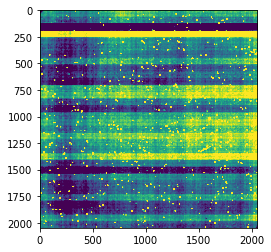

In [4]:
plt.imshow(im,vmin=-15,vmax=-8)
plt.show()

We refrom the 2D image to the channel cube as...

In [5]:
channel_cube=image_to_channel_cube(im)

This is the image of Channel 0. Compare this with the above raw data. You will find the top band (Channel 1) corresponds to channel_cube[0,:,:]

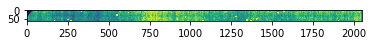

In [6]:
plt.imshow(channel_cube[0,:,:],vmin=-15,vmax=-8)
plt.show()

The bias is estimated the left and right edge regions of the channel.

In [7]:
from pyird.image.bias import bias_subtract
bias_subtracted_channel_cube, bias=bias_subtract(channel_cube)

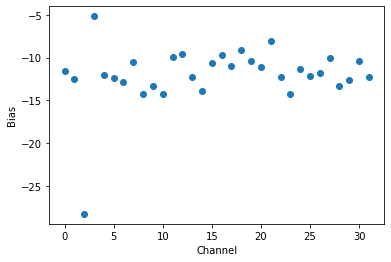

In [10]:
plt.plot(bias,"o")
plt.xlabel("Channel")
plt.ylabel("Bias")
plt.show()

Then reconverting the channel cube to the image.

In [11]:
bias_subtracted_im=channel_cube_to_image(bias_subtracted_channel_cube)

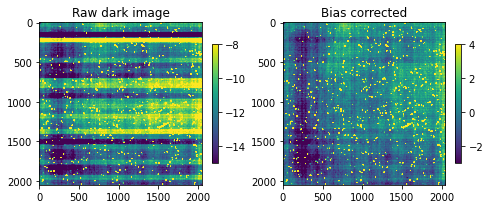

In [23]:
fig=plt.figure(figsize=(8,4))
ax1=fig.add_subplot(121)
cc=ax1.imshow(im,vmin=-15.0,vmax=-8.0)
plt.colorbar(cc,shrink=0.55)
ax1.set_title("Raw dark image")
ax2=fig.add_subplot(122)
cc=ax2.imshow(bias_subtracted_im,vmin=-3.0,vmax=4.0)
plt.colorbar(cc,shrink=0.55)
ax2.set_title("Bias corrected")
plt.savefig("bias_correction.png")
plt.show()